In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from numpy import transpose
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
from math import  sin, cos, pi

In [ ]:
df = pd.read_excel('sample_full.xlsx')

In [ ]:
#убираем выбросы
df1 = df[df['SI'] < 500]
df1.reset_index(drop= True , inplace=True )

In [ ]:
df_mol = df1[['SI', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumHAфcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 'NumAliphaticHeterocycles', 'RingCount']]

In [ ]:
#матрица корреляции
correlations = df_mol.corr()
correlations

,SI,HeavyAtomCount,NHOHCount,NOCount,NumHAфcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount
SI,1.000000,0.082015,0.131945,0.101673,0.087569,0.130186,0.072838,0.066574,0.086831,0.047099,-0.040651,0.037442
HeavyAtomCount,0.082015,1.000000,0.508557,0.800376,0.762991,0.534812,0.762081,0.738515,0.991664,0.429218,0.278806,0.752190
NHOHCount,0.131945,0.508557,1.000000,0.599914,0.536083,0.986901,0.547510,0.336689,0.536696,0.004467,0.079382,0.212864
NOCount,0.101673,0.800376,0.599914,1.000000,0.960155,0.618373,0.947514,0.560191,0.783705,0.420099,0.354931,0.543428
NumHAфcceptors,0.087569,0.762991,0.536083,0.960155,1.000000,0.562245,0.923809,0.515236,0.743972,0.440129,0.374471,0.537468
NumHDonors,0.130186,0.534812,0.986901,0.618373,0.562245,1.000000,0.564076,0.338219,0.562381,0.018473,0.102846,0.233744
NumHeteroatoms,0.072838,0.762081,0.547510,0.947514,0.923809,0.564076,1.000000,0.511206,0.741070,0.451068,0.369917,0.497264
NumRotatableBonds,0.066574,0.738515,0.336689,0.560191,0.515236,0.338219,0.511206,1.000000,0.753020,0.224272,-0.025863,0.327938
NumValenceElectrons,0.086831,0.991664,0.536696,0.783705,0.743972,0.562381,0.741070,0.753020,1.000000,0.319065,0.279353,0.715845
NumAromaticRings,0.047099,0.429218,0.004467,0.420099,0.440129,0.018473,0.451068,0.224272,0.319065,1.000000,-0.014234,0.488762


#Стандартизация

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
norm = MinMaxScaler()
df_norm = norm.fit_transform(df_mol)

In [ ]:
features =  ['SI', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumHAфcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 'NumAliphaticHeterocycles', 'RingCount']

In [ ]:
df_norm = pd.DataFrame(df_norm, columns = features)

#Кластеризация к-средних

In [ ]:
#удаляем нулы
df_norm = df_norm.dropna()
df_norm.reset_index(drop= True , inplace=True )
# df_norm.reshape(-1,1)

In [ ]:
#метод главных компонент
pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(df_norm), columns = ['x', 'y'])
# df_pca.reset_index(drop= True , inplace=True )

In [ ]:
df_pca

,x,y
0,-0.488635,-0.035348
1,-0.489743,-0.018546
2,-0.515135,-0.011666
3,-0.454858,-0.011316
4,-0.499066,-0.019641
...,...,...
1343,-0.418017,0.209109
1344,-0.442311,-0.089962
1345,-0.589720,0.004059
1346,-0.395581,-0.110404


In [ ]:
#создаем модель
model = KMeans(n_clusters=6)
model.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
#коэффициент силуэта
labels = model.labels_
sklearn.metrics.silhouette_score(df_norm, labels)

0.26226177199167616

In [ ]:
# Получаем матрицу нагрузок
loadings_matrix = pca.components_
components = pd.DataFrame(transpose(loadings_matrix), columns = ['x', 'y'])

In [ ]:
components

,x,y
0,0.029100,-0.057070
1,0.332187,-0.075685
2,0.226510,-0.096128
3,0.376523,-0.040984
4,0.370308,-0.024420
5,0.268036,-0.100171
6,0.387032,-0.033501
7,0.156330,-0.134199
8,0.306895,-0.049352
9,0.266965,-0.412617


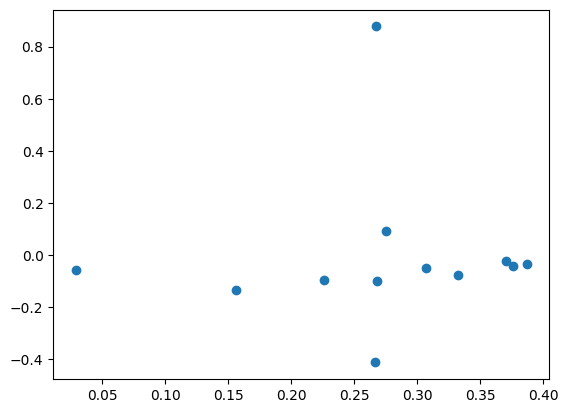

In [ ]:
plt.scatter(components['x'], components['y'])

In [ ]:
cluster_0_indices = np.where(model.labels_ == 0)[0]
cluster_1_indices = np.where(model.labels_ == 1)[0]
cluster_3_indices = np.where(model.labels_ == 2)[0]
cluster_4_indices = np.where(model.labels_ == 3)[0]
cluster_5_indices = np.where(model.labels_ == 4)[0]
cluster_6_indices = np.where(model.labels_ == 5)[0]
# cluster_4_indices = np.where(model.labels_ == 3)[0]

In [ ]:
x_0 = df_pca.loc[cluster_0_indices, 'x']
x_1 = df_pca.loc[cluster_1_indices, 'x']
y_0 = df_pca.loc[cluster_0_indices, 'y']
y_1 = df_pca.loc[cluster_1_indices, 'y']
x_3 = df_pca.loc[cluster_3_indices, 'x']
y_3 = df_pca.loc[cluster_3_indices, 'y']
x_4 = df_pca.loc[cluster_4_indices, 'x']
y_4 = df_pca.loc[cluster_4_indices, 'y']
x_5 = df_pca.loc[cluster_5_indices, 'x']
y_5 = df_pca.loc[cluster_5_indices, 'y']
x_6 = df_pca.loc[cluster_6_indices, 'x']
y_6 = df_pca.loc[cluster_6_indices, 'y']

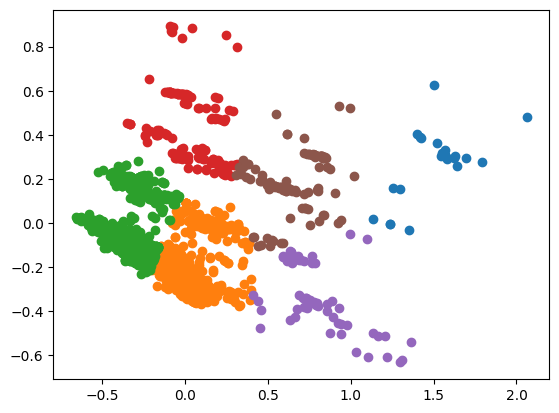

In [ ]:
#визуализация в двух компонентах
plt.scatter(x_0, y_0)
plt.scatter(x_1, y_1)
plt.scatter(x_3, y_3)
plt.scatter(x_4, y_4)
plt.scatter(x_5, y_5)
plt.scatter(x_6, y_6)

In [ ]:
#для двух классов
print(df_norm['SI'].loc[cluster_0_indices].mean(),
df_norm['SI'].loc[cluster_1_indices].mean())
# df_norm['SI'].loc[cluster_3_indices].mean(),
# df_norm['SI'].loc[cluster_4_indices].mean())

In [ ]:
#для четырех классов
print(df_norm['SI'].loc[cluster_0_indices].mean(),
df_norm['SI'].loc[cluster_1_indices].mean(),
df_norm['SI'].loc[cluster_3_indices].mean(),
df_norm['SI'].loc[cluster_4_indices].mean(),
      df_norm['SI'].loc[cluster_5_indices].mean(),
      df_norm['SI'].loc[cluster_6_indices].mean())

In [ ]:
#для трех классов
print(df_mol['SI'].loc[cluster_0_indices].mean(),
df_mol['SI'].loc[cluster_1_indices].mean(),
df_mol['SI'].loc[cluster_3_indices].mean())
# df_norm['SI'].loc[cluster_4_indices].mean())

In [ ]:
#для шести классов средние значения SI
print(df_mol['SI'].loc[cluster_0_indices].mean(),
df_mol['SI'].loc[cluster_1_indices].mean(),
df_mol['SI'].loc[cluster_3_indices].mean(),
df_mol['SI'].loc[cluster_4_indices].mean(),
      df_mol['SI'].loc[cluster_5_indices].mean(),
      df_mol['SI'].loc[cluster_6_indices].mean())

88.64583333333333 31.147136349260084 20.552975297641808 10.648342243654081 31.710466211443375 18.486244662064717


Функции квартимакс и варимакс для расчета критериев q и v при вращении факторных осей

In [ ]:
#вращение осей
def quartimax (X):
    value = 0
    m = X.shape[1]
    for row in X:
        value += (sum (row**4) - (sum(row**2))**2)/m**2
    return value

def varimax (X) :
    value = 0
    k = X.shape[0]
    for row in X.T:
        value += (k*sum(row**4) -sum(row**2)**2)/k**2
    return value

def criteria (method,X):
    if method == 'varimax':
        return varimax(X)
    elif method == 'quartimax':
        return quartimax (X)
    else:
        print ('wrong input')


Вращение в случае двух факторов


In [ ]:
rad_column = []
grad_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.0001):

    rad_column.append(alpha)
    grad_column.append(alpha*180/pi)

    grad = alpha
    T = [[cos(grad),sin(grad)],
         [-sin(grad),cos(grad)]]
    B = np.dot (components,T)
    dict_for_B[criteria('quartimax',B)] = B
    criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([])
df_rotation['rad'] = rad_column
df_rotation['grad'] = grad_column
df_rotation ['criteria'] = criteria_column
df_rotation

In [ ]:
#поворачиваем на 45 грудусов
# criteria_best = df_rotation[df_rotation.index(df_rotation['grad'] == 45.7965165648067)]
# criteria_best
a = df_rotation.loc[df_rotation['grad'] == 45.653277116024]
a['criteria']. values [0]

-0.07523121033197501

Вывод лучшего угла вращения для двух факторов

In [ ]:
rad_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rad']
grad_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grad']
print ('Лучший угол для вращения :{:.3f} радиан или {:.3f} градусов'.format (rad_best,grad_best))

Лучший угол для вращения :0.283 радиан или 16.238 градусов


Матрица факторного отображения после вращения на 45 град

In [ ]:
B = dict_for_B[a['criteria']. values [0]]
df_B = pd.DataFrame(data=B, columns=['Factor_'+str(i +1) for i in range(2)])
#столбцы могут быть в другом порядке, не как в статистке, но это не влияет на конечный результат
df_B

,Factor_1,Factor_2
0,0.061153,-0.019082
1,0.286322,0.184651
2,0.227074,0.094789
3,0.292498,0.240613
4,0.276308,0.247746
5,0.258991,0.121659
6,0.294492,0.253359
7,0.205243,0.017990
8,0.249812,0.184971
9,0.481680,-0.097506


In [ ]:
Rh_real = np.dot(B,B.T)

pd.DataFrame(Rh_real, index = features, columns = features)

,SI,HeavyAtomCount,NHOHCount,NOCount,NumHAфcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount
SI,0.004104,0.013986,0.012078,0.013296,0.012170,0.013517,0.013175,0.012208,0.011747,0.031317,-0.042290,0.002847
HeavyAtomCount,0.013986,0.116076,0.082519,0.128178,0.124859,0.096619,0.131102,0.062087,0.105682,0.119911,0.022317,0.084586
NHOHCount,0.012078,0.082519,0.060547,0.089226,0.086226,0.070342,0.090887,0.048311,0.074259,0.100134,-0.023835,0.053649
NOCount,0.013296,0.128178,0.089226,0.143449,0.140430,0.105027,0.147100,0.064362,0.117576,0.117429,0.064596,0.099928
NumHAфcceptors,0.012170,0.124859,0.086226,0.140430,0.137724,0.101702,0.144139,0.061167,0.114851,0.108935,0.077466,0.099716
NumHDonors,0.013517,0.096619,0.070342,0.105027,0.101702,0.081877,0.107094,0.055345,0.087202,0.112888,-0.016293,0.064713
NumHeteroatoms,0.013175,0.131102,0.090887,0.147100,0.144139,0.107094,0.150916,0.065000,0.120432,0.117147,0.073967,0.103498
NumRotatableBonds,0.012208,0.062087,0.048311,0.064362,0.061167,0.055345,0.065000,0.042448,0.054600,0.097107,-0.075971,0.030888
NumValenceElectrons,0.011747,0.105682,0.074259,0.117576,0.114851,0.087202,0.120432,0.054600,0.096620,0.102294,0.038663,0.080007
NumAromaticRings,0.031317,0.119911,0.100134,0.117429,0.108935,0.112888,0.117147,0.097107,0.102294,0.241523,-0.290653,0.036152


In [ ]:
D2 = correlations.values - Rh_real

pd.DataFrame(D2,index = features,columns = features)

,SI,HeavyAtomCount,NHOHCount,NOCount,NumHAфcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount
SI,0.995896,0.068029,0.119868,0.088378,0.075399,0.116669,0.059663,0.054366,0.075084,0.015783,0.001639,0.034595
HeavyAtomCount,0.068029,0.883924,0.426038,0.672198,0.638132,0.438193,0.630979,0.676428,0.885982,0.309307,0.256489,0.667604
NHOHCount,0.119868,0.426038,0.939453,0.510688,0.449857,0.916559,0.456623,0.288379,0.462437,-0.095667,0.103218,0.159215
NOCount,0.088378,0.672198,0.510688,0.856551,0.819725,0.513345,0.800414,0.495829,0.666130,0.302670,0.290335,0.443500
NumHAфcceptors,0.075399,0.638132,0.449857,0.819725,0.862276,0.460544,0.779670,0.454068,0.629121,0.331194,0.297006,0.437752
NumHDonors,0.116669,0.438193,0.916559,0.513345,0.460544,0.918123,0.456982,0.282874,0.475179,-0.094415,0.119139,0.169031
NumHeteroatoms,0.059663,0.630979,0.456623,0.800414,0.779670,0.456982,0.849084,0.446205,0.620638,0.333921,0.295950,0.393766
NumRotatableBonds,0.054366,0.676428,0.288379,0.495829,0.454068,0.282874,0.446205,0.957552,0.698420,0.127165,0.050108,0.297049
NumValenceElectrons,0.075084,0.885982,0.462437,0.666130,0.629121,0.475179,0.620638,0.698420,0.903380,0.216771,0.240691,0.635838
NumAromaticRings,0.015783,0.309307,-0.095667,0.302670,0.331194,-0.094415,0.333921,0.127165,0.216771,0.758477,0.276419,0.452610


In [ ]:
#кооридинаты повернутые на 45 град
f_len = len (features)
scr_charact = np.eye(f_len)
for i in range(f_len):
    scr_charact[i][i] = D2[i][i]

Q = np.linalg.inv(np.dot(np.dot(B.T, np.linalg.inv(scr_charact)), B))
W = np.dot(np.dot(B.T,np.linalg.inv(scr_charact)),df_norm.values.T)
F = np.dot(Q, W)
#df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect'] ) #для 2х
df_factor_scores_lect = pd.DataFrame (data =F.T, columns = ['Factor1_lect','Factor2_lect'] )
#ДЛЯ 2x

df_factor_scores_lect

,Factor1_lect,Factor2_lect
0,0.237469,0.139880
1,0.232760,0.140649
2,0.210913,0.128413
3,0.260390,0.159903
4,0.225259,0.135602
...,...,...
1343,0.116815,0.379222
1344,0.305041,0.166233
1345,0.145486,0.090393
1346,0.346759,0.187956


In [ ]:
#обучаем модель на новых коориднатах, 5 классов
model = KMeans(n_clusters=5)
model.fit(df_factor_scores_lect)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
#коэффициент силуэта
labels = model.labels_
sklearn.metrics.silhouette_score(df_factor_scores_lect, labels)

0.4436086060246755

In [ ]:
cluster_0_indices = np.where(model.labels_ == 0)[0]
cluster_1_indices = np.where(model.labels_ == 1)[0]
cluster_3_indices = np.where(model.labels_ == 2)[0]
cluster_4_indices = np.where(model.labels_ == 3)[0]
cluster_5_indices = np.where(model.labels_ == 4)[0]
# cluster_6_indices = np.where(model.labels_ == 5)[0]
# cluster_4_indices = np.where(model.labels_ == 3)[0]

In [ ]:
x_0 = df_factor_scores_lect.loc[cluster_0_indices, 'Factor1_lect']
x_1 = df_factor_scores_lect.loc[cluster_1_indices, 'Factor1_lect']
y_0 = df_factor_scores_lect.loc[cluster_0_indices, 'Factor2_lect']
y_1 = df_factor_scores_lect.loc[cluster_1_indices, 'Factor2_lect']
x_3 = df_factor_scores_lect.loc[cluster_3_indices, 'Factor1_lect']
y_3 = df_factor_scores_lect.loc[cluster_3_indices, 'Factor2_lect']
x_4 = df_factor_scores_lect.loc[cluster_4_indices, 'Factor1_lect']
y_4 = df_factor_scores_lect.loc[cluster_4_indices, 'Factor2_lect']
x_5 = df_factor_scores_lect.loc[cluster_5_indices, 'Factor1_lect']
y_5 = df_factor_scores_lect.loc[cluster_5_indices, 'Factor2_lect']
# x_6 = df_factor_scores_lect.loc[cluster_6_indices, 'Factor1_lect']
# y_6 = df_factor_scores_lect.loc[cluster_6_indices, 'Factor2_lect']

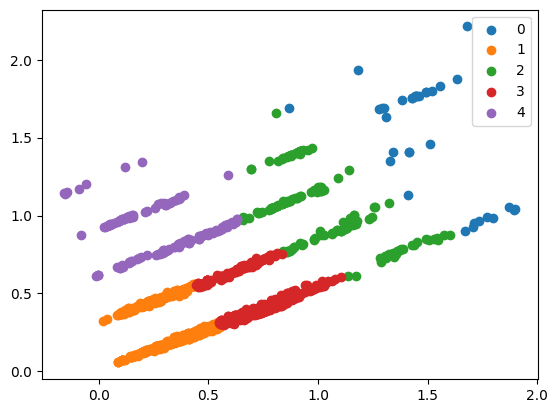

In [ ]:
#визуализация повернутая
plt.scatter(x_0, y_0, label = '0')
plt.scatter(x_1, y_1,label = '1' )
plt.scatter(x_3, y_3, label = '2')
plt.scatter(x_4, y_4, label = '3')
plt.scatter(x_5, y_5, label = '4')
plt.legend()
# plt.scatter(x_6, y_6)

In [ ]:
#считаем средние каждого признака для каждого класса
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#добавялем результаты кластеризации
df_norm['kmeans'] = model.labels_

def mean_df(method, n_clust): #нахождение координат центра класса
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = []
        for j in range(f_len):
            tmp.append(df_norm[df_norm['kmeans'] == n].iloc[:, j].mean())

        tmp.append(df_norm[df_norm['kmeans'] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}

# for method, n in N_CLUSTERS.items():
means['k_means'] = pd.DataFrame(
      mean_df('kmeans', 5),
      columns=columns,
      index=["{}_{}".format('k_means', i) for i in range(5)]
    )

# for method in CLUSTER_METHODS:
print(means['k_means'])

                 SI  HeavyAtomCount  NHOHCount   NOCount  NumHAфcceptors  \
k_means_0  0.147449        0.749035   0.679121  0.749660        0.725714   
k_means_1  0.045025        0.160390   0.062803  0.135198        0.132867   
k_means_2  0.060456        0.476132   0.202797  0.523500        0.526948   
k_means_3  0.061347        0.282564   0.127105  0.272815        0.253499   
k_means_4  0.021688        0.242117   0.070513  0.236111        0.205556   

           NumHDonors  NumHeteroatoms  NumRotatableBonds  NumValenceElectrons  \
k_means_0    0.776623        0.760544           0.364762             0.736569   
k_means_1    0.065003        0.158092           0.093240             0.160312   
k_means_2    0.237308        0.562461           0.256277             0.439508   
k_means_3    0.142828        0.320327           0.162754             0.257606   
k_means_4    0.081439        0.286376           0.084028             0.221591   

           NumAromaticRings  NumAliphaticHeterocycles  R

Text(0.5, 1.0, 'k_means method')

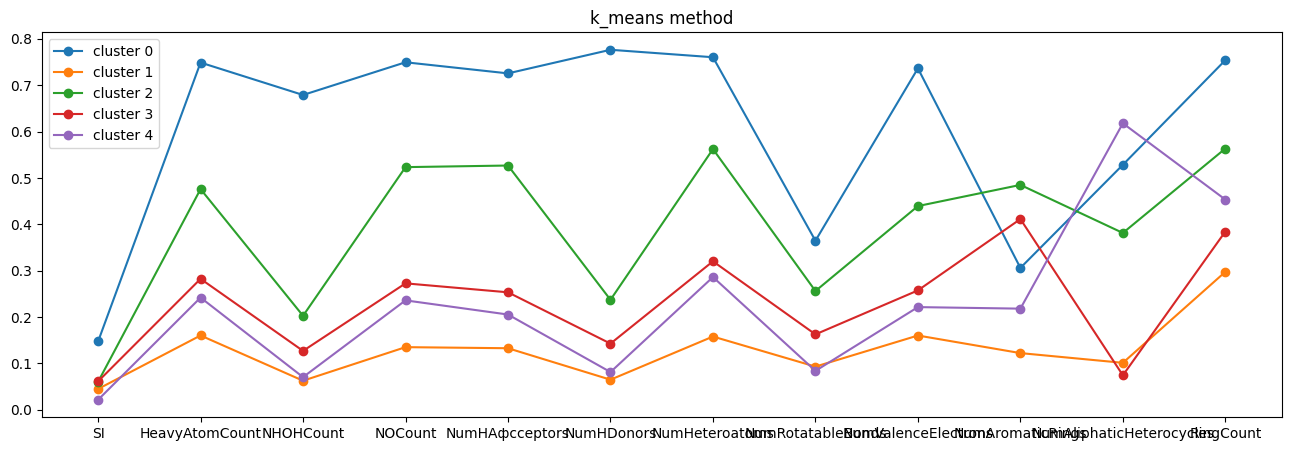

In [ ]:
#средние по каждому признаку в каждом классе
cur_mean = means['k_means']
plt.figure(figsize=(16,5))
#для каждого кластера из данного метода строим график
for n in range(cur_mean.shape[0]):
    plt.plot(features, cur_mean.iloc[n, :-1], marker='o', label='cluster {}'.format(n))
#         plt.ylim(-2,7)
    plt.legend(loc = 'upper left') #легенда графика
plt.title('{} method'.format(cur_mean.index[1][:-2])) #название


In [ ]:
#статистика по 0 классу (среднее SI, число объектов)
df_mol.loc[cluster_0_indices].describe()

,SI,HeavyAtomCount,NHOHCount,NOCount,NumHAфcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,69.551648,63.428571,8.828571,15.742857,14.514286,8.542857,15.971429,10.942857,349.885714,2.142857,2.114286,7.542857
std,117.365399,10.415728,2.093206,1.686327,2.356111,1.787915,1.806617,5.156052,64.045834,1.896481,1.388428,1.668794
min,1.000000,42.000000,0.000000,12.000000,8.000000,0.000000,12.000000,6.000000,228.000000,0.000000,0.000000,4.000000
25%,5.150000,58.500000,8.000000,15.000000,14.000000,8.000000,15.000000,8.500000,310.000000,1.000000,0.500000,6.000000
50%,12.200000,65.000000,9.000000,16.000000,15.000000,9.000000,16.000000,9.000000,366.000000,1.000000,3.000000,8.000000
75%,77.600000,71.000000,10.000000,16.500000,16.000000,9.000000,17.000000,11.500000,400.000000,4.000000,3.000000,9.000000
max,471.700000,82.000000,13.000000,21.000000,20.000000,11.000000,21.000000,30.000000,460.000000,6.000000,4.000000,10.000000
